# Handwritten digits Classifier

## Introduction

In this project am going to use two algorithms K-Nearest Neighbors and Deep Neural Network to classify hand-written digits from images. The dataset contains 8 x 8 pixels images. We will be reading that dataset direclty from sklearn.datasets but it can be also find [here](http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits).

## Summary of results

It was very easy to overfit our model. Using K-Neighbors classifier we got the best accuracy score: 0.967

## Data introduction

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, KFold, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_digits
%matplotlib inline

In [4]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [5]:
labels = pd.Series(digits.target)

In [6]:
data = pd.DataFrame(digits.data)
data.head(1)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0


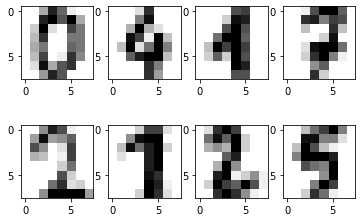

In [7]:
row = 0
for n in range(0,8):
    ax = plt.subplot(2,4,n+1)
    first_image = data.iloc[row]
    np_image = first_image.values
    np_image = np_image.reshape(8,8)
    ax = plt.imshow(np_image, cmap='gray_r')
    row += 100
    if n == 3:
        row+=1000

## Model selection

### k-Nearest Neighbors

In [8]:
def knn_validate(data,labels,k):
    kf = KFold(n_splits=4,shuffle=True,random_state=1)
    knn = KNeighborsClassifier(n_neighbors=k)
    rmse = cross_val_score(knn,data,labels,scoring='accuracy',cv=kf)
    rmse_mean = np.mean(rmse)
    rmse_std = np.std(rmse)
    return rmse_mean, rmse_std

knn_results={}
for k in range(1,15):
    knn_results[k] = knn_validate(data,labels,k)

In [9]:
knn_results

{1: (0.9827456075228903, 0.005080100024846866),
 2: (0.9805184360306854, 0.007456321517955216),
 3: (0.9855283345706509, 0.005108495408949403),
 4: (0.9849690670626082, 0.008242959752450835),
 5: (0.9832999257609502, 0.008111616735676333),
 6: (0.9805159613956941, 0.008394597578538979),
 7: (0.9821863400148477, 0.006687701293013929),
 8: (0.9816295471417965, 0.0069382766952786655),
 9: (0.9788468200940361, 0.007138930372246532),
 10: (0.9782887899034892, 0.009104204246080858),
 11: (0.9771789161098738, 0.0055527037575031435),
 12: (0.9771764414748825, 0.00839714322186916),
 13: (0.9755085374907201, 0.006505997057457977),
 14: (0.9755073001732245, 0.007884739603367469)}

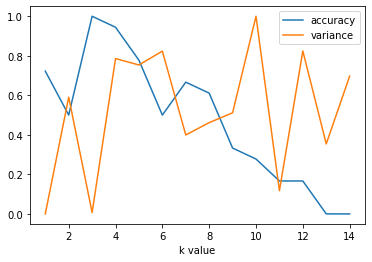

In [10]:
knn_df = pd.DataFrame(knn_results).T

accuracy = knn_df[0]
varaince = knn_df[1]
accuracy = (accuracy - accuracy.min()) / (accuracy.max() - accuracy.min())
varaince = (varaince - varaince.min()) / (varaince.max() - varaince.min())
plt.plot(accuracy,label='accuracy')
plt.plot(varaince,label='variance')
plt.legend()
plt.xlabel('k value')
plt.show()

We ran our model for k in range 1-14. As we can see for k=3 we got the best results. Our model was able to crack digits with 0.985 accuracy.

### Random forest

In [11]:
def forest_validate(data,labels,n_tree,depth,leaf):
    kf = KFold(n_splits=4,shuffle=True,random_state=1)
    forest = RandomForestClassifier(n_estimators=n_tree, random_state=1, max_depth=depth, min_samples_leaf=leaf)
    results = cross_validate(forest,data,labels,scoring='accuracy',cv=kf, return_train_score=True)
    train_score = np.mean(results['train_score'])
    test_score = np.mean(results['test_score'])
    return train_score, test_score

fores_results={}
for n in range(10,200,10):
    fores_results[n] = forest_validate(data,labels,n,8,3)

In [12]:
fores_results

{10: (0.9862733484014372, 0.9410108883939619),
 20: (0.9933226160343129, 0.9554776045533283),
 30: (0.9948065709269307, 0.9571492204899776),
 40: (0.9946208356188827, 0.9588208364266271),
 50: (0.9949914801327931, 0.9604899777282849),
 60: (0.9961047905115005, 0.9621615936649344),
 70: (0.9964758480765037, 0.96271714922049),
 80: (0.9970323655821597, 0.9654974016332591),
 90: (0.9966611703334589, 0.9649418460777035),
 100: (0.9968466302741117, 0.9638282603316011),
 110: (0.9966611703334589, 0.9666109873793616),
 120: (0.9968466302741117, 0.967166542934917),
 130: (0.9970320902147645, 0.9677233358079683),
 140: (0.9968464925904141, 0.9677233358079684),
 150: (0.9964758480765036, 0.9682801286810196),
 160: (0.9968467679578094, 0.9677220984904726),
 170: (0.997217687839115, 0.9688369215540709),
 180: (0.9972175501554174, 0.9688356842365751),
 190: (0.9974031477797678, 0.9682801286810196)}

It looks like for 150 trees and max depth set to 8 and number of min leaves set to 3 we got the best results. 

Lets now try Gradient boosting model.

In [31]:
def xgboost_validate(data,labels):
    xgboost = GradientBoostingClassifier(random_state=1)
    results = cross_validate(xgboost,data,labels,scoring='accuracy',cv=5, return_train_score=True)
    train_score = np.mean(results['train_score'])
    test_score = np.mean(results['test_score'])
    return train_score, test_score

xbgoost = xgboost_validate(data,labels)

In [32]:
xbgoost

(1.0, 0.9215567935623646)

Our model is quite overfitted. It didn't improve compere to the previous one. Lets try Neural network.

### Neural Network with one hidden leayer

In [13]:
def mlp_validate(data,labels,hidden_layers,kfold=4):
    kf = KFold(n_splits=kfold,shuffle=True,random_state=1)
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layers,activation='logistic')
    results = cross_validate(mlp,data,labels,scoring='accuracy',cv=kf, return_train_score=True)
    train_score = np.mean(results['train_score'])
    test_score = np.mean(results['test_score'])
    return train_score, test_score

In [14]:
mlp_results={}
for n in np.logspace(3,8, num=6,base=2):
    mlp_results[n] = mlp_validate(data,labels,(int(n),))

C:\Apps\ProgramFiles\Continuum\Anaconda2\envs\pablo\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Apps\ProgramFiles\Continuum\Anaconda2\envs\pablo\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Apps\ProgramFiles\Continuum\Anaconda2\envs\pablo\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Apps\ProgramFiles\Continuum\Anaconda2\envs\pablo\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Op

In [15]:
mlp_results

{8.0: (0.9526993164279782, 0.9232071269487752),
 16.0: (0.9910966836953864, 0.9549245236327641),
 32.0: (0.9987016427317327, 0.9699480326651819),
 64.0: (1.0, 0.9749529819351646),
 128.0: (1.0, 0.9771801534273695),
 256.0: (1.0, 0.9760678049987627)}

We ran the model in for loop and can see thhat the best result we could achieve with 128 neurons in hidden layers.
### Neural Network with two hidden leayers

In [17]:
mlp_two_layers_results= mlp_validate(data,labels,(64,64))

C:\Apps\ProgramFiles\Continuum\Anaconda2\envs\pablo\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Apps\ProgramFiles\Continuum\Anaconda2\envs\pablo\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Apps\ProgramFiles\Continuum\Anaconda2\envs\pablo\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Apps\ProgramFiles\Continuum\Anaconda2\envs\pablo\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Op

In [18]:
mlp_two_layers_results

(1.0, 0.9699492699826775)

### Neural Network with three hidden leayers

In [19]:
mlp_three_layers_results= {}
for n in [10,30,64,128]:
    mlp_three_layers_results[n] = mlp_validate(data,labels,(n,n,n),6)

C:\Apps\ProgramFiles\Continuum\Anaconda2\envs\pablo\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Apps\ProgramFiles\Continuum\Anaconda2\envs\pablo\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Apps\ProgramFiles\Continuum\Anaconda2\envs\pablo\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Apps\ProgramFiles\Continuum\Anaconda2\envs\pablo\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Op

In [20]:
mlp_three_layers_results

{10: (0.7139925898377381, 0.6314790040876997),
 30: (0.9989982932784424, 0.9449293942772204),
 64: (1.0, 0.9638331475287997),
 128: (1.0, 0.9744017094017093)}

As we can see there is quite hard to find the best hyperparameters insted of doing this manually we can use Grid search to do it for us.

## Grid Search - hyperparameters selection

In [24]:
def select_model(data,labels):
    all_X = data
    all_y = labels
    models = [
        {
            'name':'KNeighborsClassifier',
            'estimator': KNeighborsClassifier(),
            'hyperparameters':
            {
                'n_neighbors': range(1,20),
                'weights': ['distance','uniform'],
                'algorithm': ['ball_tree','kd_tree','brute'],
                'p': [1,2]
            }
        },
        {
            'name':'LogisticRegression',
            'estimator': LogisticRegression(),
            'hyperparameters':
            {
                'solver':['newton-cg', 'lbfgs', 'liblinear'],
                'class_weight': [None,'balanced']
            }
        },
        {
            'name':'RandomForestClassifier',
            'estimator': RandomForestClassifier(random_state=1),
            'hyperparameters':
            {
                'n_estimators': [10,20,30,50],
                'criterion': ['entropy','gini'],
                'max_depth': [2,5,6,8,10],
                'max_features': ['log2','sqrt'],
                'min_samples_leaf': [1,2,3,5,8],
                'class_weight': [None,'balanced']
            }
        },
        {
            'name':'MLPClassifier',
            'estimator': MLPClassifier(),
            'hyperparameters':
            {
                'hidden_layer_sizes':[(16,),(16,16),(16,16,16)],
                'activation': ['logistic','relu'],
                'max_iter':[200,1000]
            }
        }

            ]
    best_model =[]
    for model in models:
        model_perf={}
        grid = GridSearchCV(model['estimator'],model['hyperparameters'],cv=5)
        grid.fit(all_X, all_y)
        model_perf['score'] = grid.best_score_
#         model_perf['variance'] = grid.cv_results_['std_test_score']
        model_perf['params'] = grid.best_params_
        model_perf['estimator'] = grid.best_estimator_
        best_model.append(model_perf)
    return best_model

In [25]:
results = select_model(data,labels)

C:\Apps\ProgramFiles\Continuum\Anaconda2\envs\pablo\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Apps\ProgramFiles\Continuum\Anaconda2\envs\pablo\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-l

C:\Apps\ProgramFiles\Continuum\Anaconda2\envs\pablo\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Apps\ProgramFiles\Continuum\Anaconda2\envs\pablo\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Apps\ProgramFiles\Continuum\Anaconda2\envs\pablo\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Apps\ProgramFiles\Continuum\Anaconda2\envs\pablo\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Op

In [26]:
results

[{'score': 0.9671742494583719,
  'params': {'algorithm': 'ball_tree',
   'n_neighbors': 4,
   'p': 2,
   'weights': 'distance'},
  'estimator': KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                       metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                       weights='distance')},
 {'score': 0.9221138966264315,
  'params': {'class_weight': None, 'solver': 'liblinear'},
  'estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                     warm_start=False)},
 {'score': 0.9410290931600123,
  'params': {'class_weight': None,
   'criterion': 'entropy',
   'max_depth': 10,
   'max_features': 'log2',
   'min_samples_leaf': 1,
   'n_estimators': 50},
  'estimator': RandomF

The best score we got using KNeighborsClassifier. MLPClassifier was the worst one lets visualize its weights.

## Visualization of MLP weights 

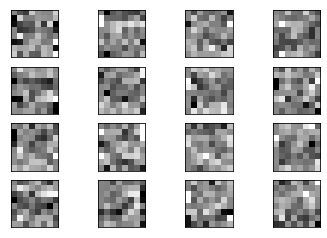

In [37]:
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
estimator = results[-1]['estimator']
vmin, vmax = estimator.coefs_[0].min(), estimator.coefs_[0].max()
for coef, ax in zip(estimator.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(8, 8), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
    
plt.show()